# Clustering Assignment </font>

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Reading and Inspecting the Data

In [2]:
#Reading the data
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#Verifying the shape of the dataframe
df.shape

(167, 10)

In [4]:
#Verifying the statistics of the dataframe
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
#Checking the null values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
#Verifying whether there are any repeated countries in the dataframe
df['country'].value_counts()

Chile             1
Thailand          1
Qatar             1
Spain             1
Uganda            1
                 ..
Malta             1
Saudi Arabia      1
Finland           1
Czech Republic    1
Australia         1
Name: country, Length: 167, dtype: int64

In [8]:
len(list(df['country'].unique()))

167

In [9]:
#Converting the exports, health and imports spending percentages to their absolute values
df['exports'] = (df['exports']/100)*df['gdpp']

In [10]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
df['health'] = (df['health']/100)*df['gdpp']
df['imports'] = (df['imports']/100)*df['gdpp']

In [12]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## EDA Analysis

### Univariant analysis

In [13]:
colmn = list(df.columns)

In [14]:
colmn

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [15]:
colmn = colmn[1:]

In [16]:
colmn

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

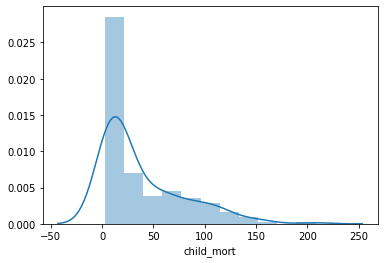

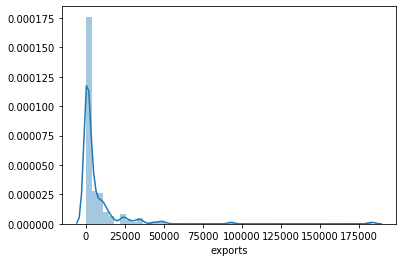

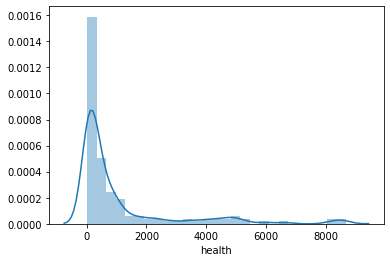

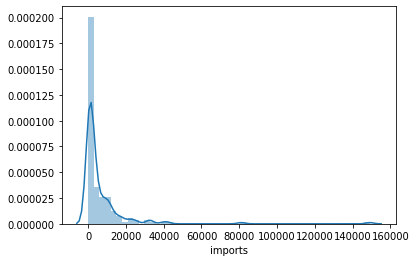

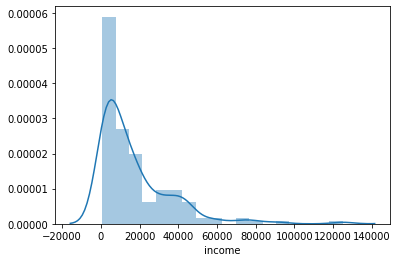

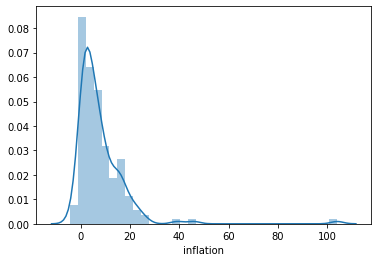

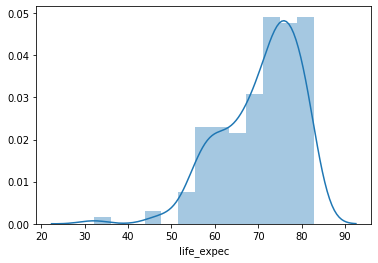

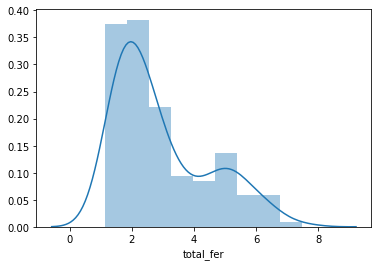

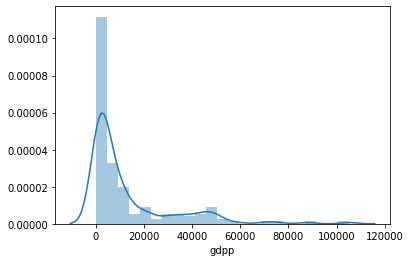

In [17]:
# Verifying the distribution of the columns using distribution plot

for i in colmn:
    sns.distplot(df[i])
    plt.show();

- **Based on above distribution plots, all are normally distributed**

In [18]:
# Correlation 
df[colmn].corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


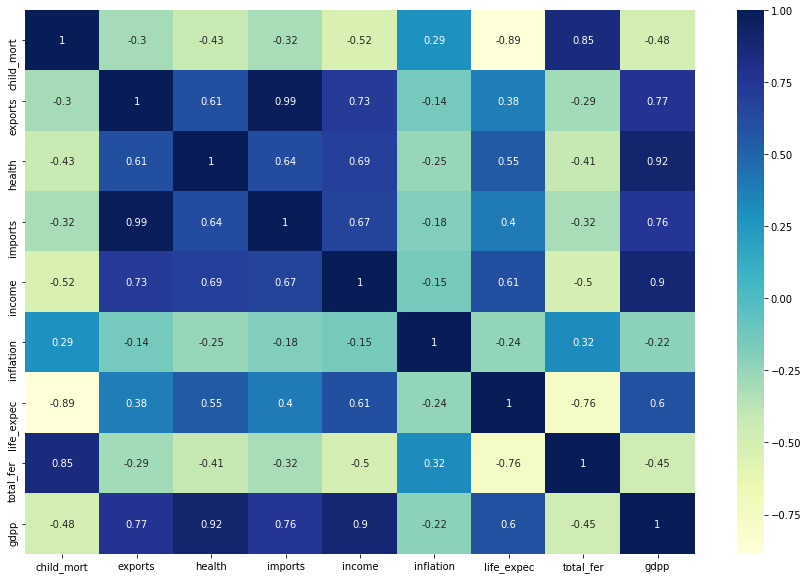

In [19]:
plt.figure(figsize=(15,10))
res = df[colmn].corr()
sns.heatmap(res, annot=True, cmap = "YlGnBu")
plt.show()

### From the above Heatmap:
- There are some high correlations among the variables
- exports and imports are highly correlated to each other
- gdpp is highly correlated with health, income and then with exports and imports
- There is a low negative correlations among life_expec and child_mort

## Outlier Analysis

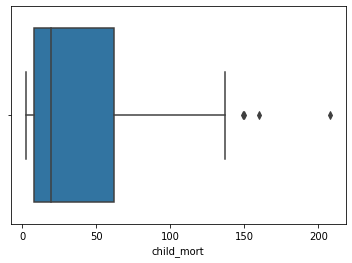

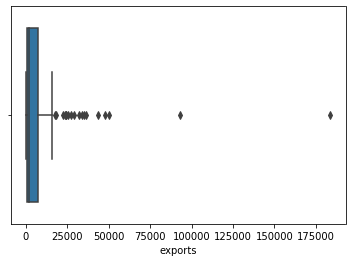

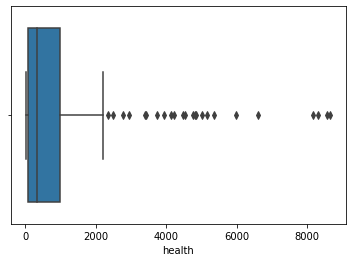

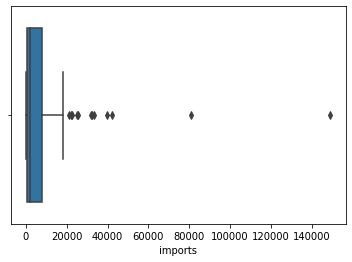

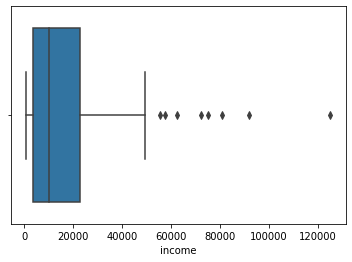

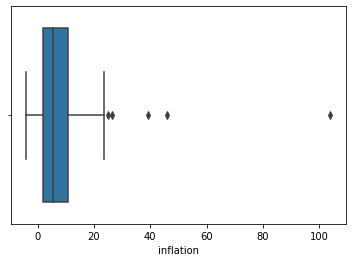

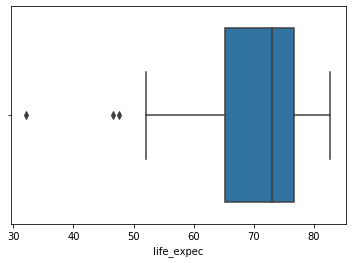

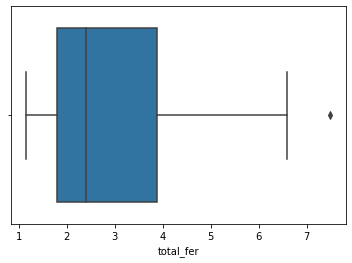

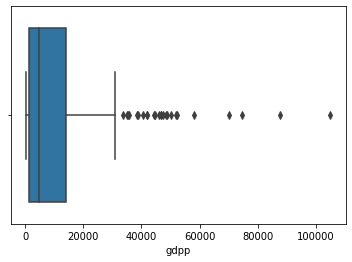

In [20]:
for x in colmn:
    sns.boxplot(df[x])
    plt.show()

### Outlier Analysis
- Most of the variables are having outliers. 
- Child_mort, inflation, and total_ferti variables gives some insights to the business need, lets not remove the higher range outliers from these 3 variables
- Outliers for exports, health, imports, income variables has to handle otherwise it will skew the analysis.


In [21]:
c = df[['exports','health','imports','income','gdpp']]

In [22]:
for i in c:
    q = df[i].quantile(0.97)
    df[i][df[i] >= q] = q
    

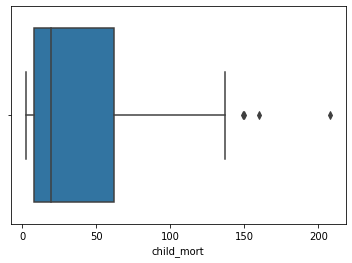

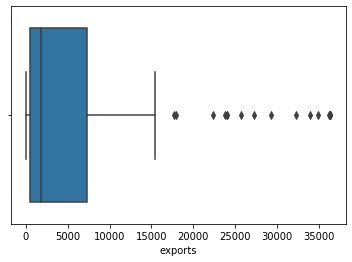

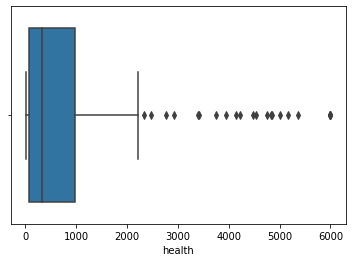

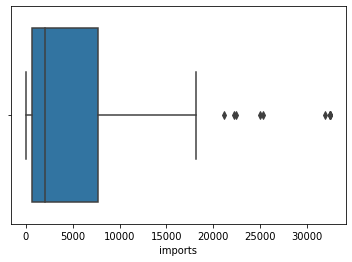

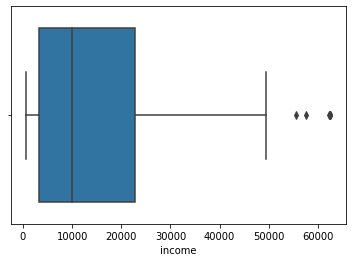

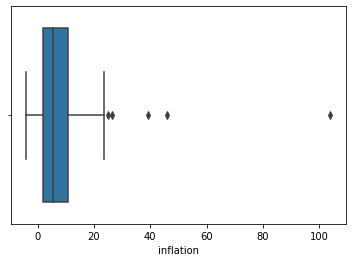

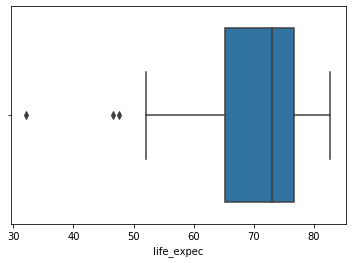

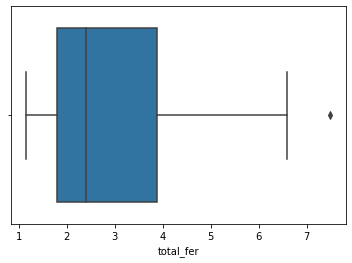

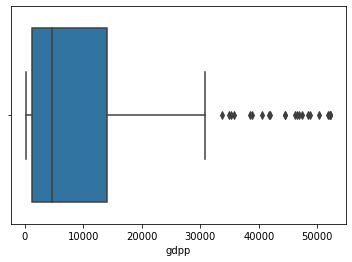

In [23]:
for x in colmn:
    sns.boxplot(df[x])
    plt.show()

## Hopkins Statistics

In [24]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
# Using the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(df.drop('country', axis=1))

0.9030066434547815

- Greater than 90% is a very good value. This means our data is very different from randomly scattered data.The more the dataset is different from the random distribution, the better candidate it is for performing Clustering.

In [26]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
countries_scaled = scaler.fit_transform(df.drop('country', axis=1))

In [27]:
type(countries_scaled)

numpy.ndarray

In [28]:
countries_scaled = pd.DataFrame(countries_scaled)
countries_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.643696,-0.606962,-0.672781,-0.905600,0.157336,-1.619092,1.902882,-0.748206
1,-0.538949,-0.525732,-0.463018,-0.449705,-0.394557,-0.312347,0.647866,-0.859973,-0.520168
2,-0.272833,-0.464315,-0.515195,-0.525024,-0.212129,0.789274,0.670423,-0.038404,-0.496314
3,2.007808,-0.411654,-0.569579,-0.510413,-0.642093,1.387054,-1.179234,2.128151,-0.556273
4,-0.695634,-0.048875,-0.165059,0.216923,0.168696,-0.601749,0.704258,-0.541946,0.002701


In [29]:
countries_scaled.columns = colmn
countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.643696,-0.606962,-0.672781,-0.905600,0.157336,-1.619092,1.902882,-0.748206
1,-0.538949,-0.525732,-0.463018,-0.449705,-0.394557,-0.312347,0.647866,-0.859973,-0.520168
2,-0.272833,-0.464315,-0.515195,-0.525024,-0.212129,0.789274,0.670423,-0.038404,-0.496314
3,2.007808,-0.411654,-0.569579,-0.510413,-0.642093,1.387054,-1.179234,2.128151,-0.556273
4,-0.695634,-0.048875,-0.165059,0.216923,0.168696,-0.601749,0.704258,-0.541946,0.002701


## Clustering Analysis

### K-Means
- Elbow curve method and the silhouette score methods are the two methods used to find the optimum number of clusters



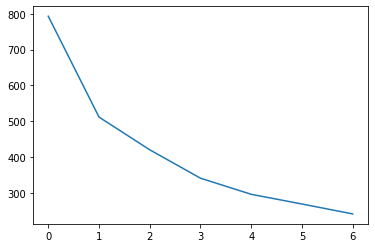

In [30]:
#Elbow Curve Method/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

- Based on the Elbow curve method, it is clearly seen that n_clusters = 3

In [31]:
# Silhoutte Score Method
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    #initialise K-means
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries_scaled)
    cluster_labels = kmeans.labels_
    
    #Silhoutte score
    silhouette_avg = silhouette_score(countries_scaled, cluster_labels)
    print("n_clusters = {0}, the siloutte score is {1}".format(num_clusters,silhouette_avg))

n_clusters = 2, the siloutte score is 0.4942188045326538
n_clusters = 3, the siloutte score is 0.4271232295006371
n_clusters = 4, the siloutte score is 0.4109552095572341
n_clusters = 5, the siloutte score is 0.4122737649540711
n_clusters = 6, the siloutte score is 0.3198221355201532
n_clusters = 7, the siloutte score is 0.30594460238390453
n_clusters = 8, the siloutte score is 0.32966246696334967
n_clusters = 9, the siloutte score is 0.3157959504682349
n_clusters = 10, the siloutte score is 0.2715840075027266


- Any score which is near to 1 is good, based on our silhouette scores 0.494 is highest but from business perspective 2 clusters might not be the optimal number. So, choosing the n-clusters for next highest score is 0.427 is for 3. 
- **Based on both Elbow curve/SSB method and Silhouette score 3 seems the best optimum number of clusters (n_clusters = 3)**

In [32]:
# Final model with  k = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(countries_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [33]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [34]:
df['clusters'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [35]:
df['clusters'].value_counts()

1    89
0    48
2    30
Name: clusters, dtype: int64

## Visualization

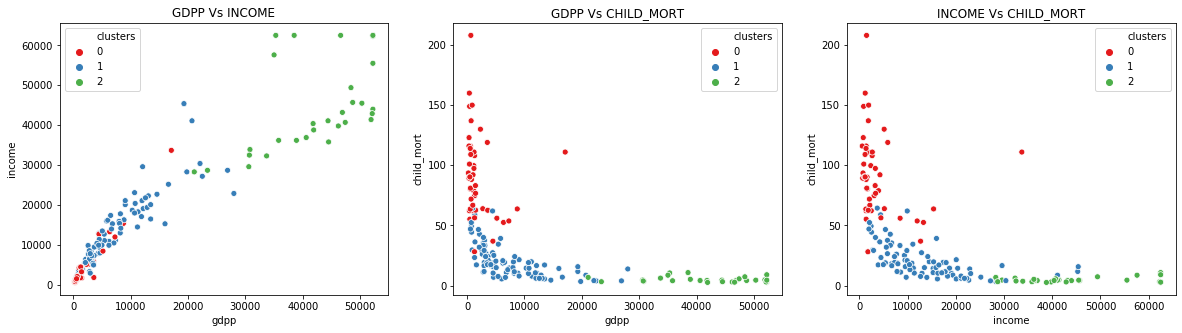

In [36]:
plt.figure(figsize = [20,5])
plt.subplot(1,3,1) 
sns.scatterplot(x = 'gdpp', y = 'income', hue= 'clusters', data=df, palette='Set1')
plt.title("GDPP Vs INCOME")
plt.subplot(1,3,2)
sns.scatterplot(x='gdpp', y='child_mort', hue= 'clusters', data=df, palette='Set1')
plt.title("GDPP Vs CHILD_MORT")
plt.subplot(1,3,3)
sns.scatterplot(x='income', y='child_mort', hue= 'clusters', data=df, palette='Set1')
plt.title("INCOME Vs CHILD_MORT")
plt.show()

- Based on the scatter plots, the three clusters are clearly evident. 

## Cluster Profiling

As mentioned in the problem statement, we are performing cluster profiling on GDPP, CHILD_MORT and INCOME by differentiating the clusters of developed countries from the clusters of under-developed countries.

In [37]:
prof = df[['gdpp','child_mort','income','clusters']].groupby('clusters').mean()
prof

,gdpp,child_mort,income
clusters,,,
0,1909.208333,91.610417,3897.354167
1,7552.494382,20.726966,13626.853933
2,42219.666667,4.970000,44372.666667


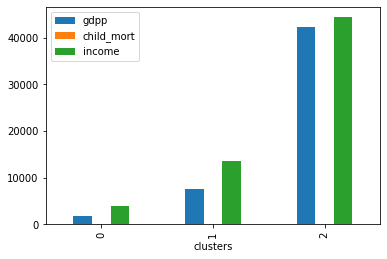

In [38]:
prof.plot(kind='bar')
plt.show()

- From the bar plot, Cluster 0 is having LOW GDPP, LOW INCOME and HIGH CHILD_MORT.

#### Let's pull the under developed countries (cluster 0 - Low gdpp, low income, high child_mort) into a separate dataframe

In [39]:
under_dev_countries = df[df['clusters']==0]
under_dev_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,0


In [40]:
under_dev_countries.shape

(48, 11)

- **under_dev_countries dataframe is having the 48 countries cluster of interest, let us sort in descending order to find the countries which are in dire need of aid.**

In [41]:
final_listofcountries = under_dev_countries.sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False])
final_listofcountries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.790,60.8,4.60,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.56,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.31,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.600,61.7,4.61,482.0,0


## Hierarchial Clustering: Single linkage, Complete Linkage

In [42]:
countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.643696,-0.606962,-0.672781,-0.905600,0.157336,-1.619092,1.902882,-0.748206
1,-0.538949,-0.525732,-0.463018,-0.449705,-0.394557,-0.312347,0.647866,-0.859973,-0.520168
2,-0.272833,-0.464315,-0.515195,-0.525024,-0.212129,0.789274,0.670423,-0.038404,-0.496314
3,2.007808,-0.411654,-0.569579,-0.510413,-0.642093,1.387054,-1.179234,2.128151,-0.556273
4,-0.695634,-0.048875,-0.165059,0.216923,0.168696,-0.601749,0.704258,-0.541946,0.002701


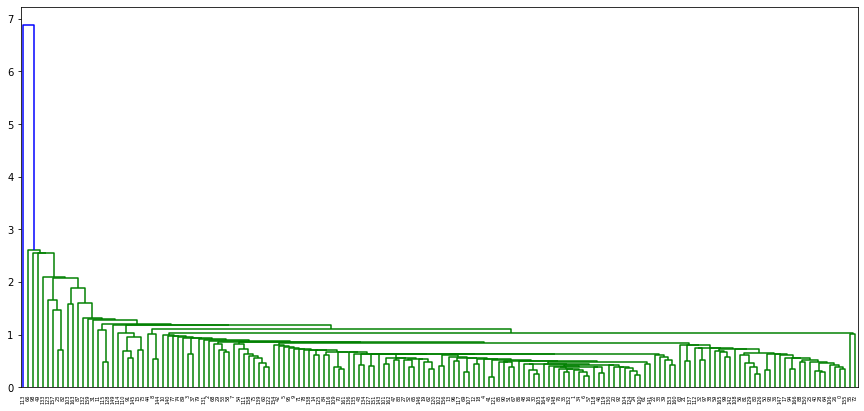

In [43]:
# single linkage
plt.figure(figsize=(15,7))
mergings = linkage(countries_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

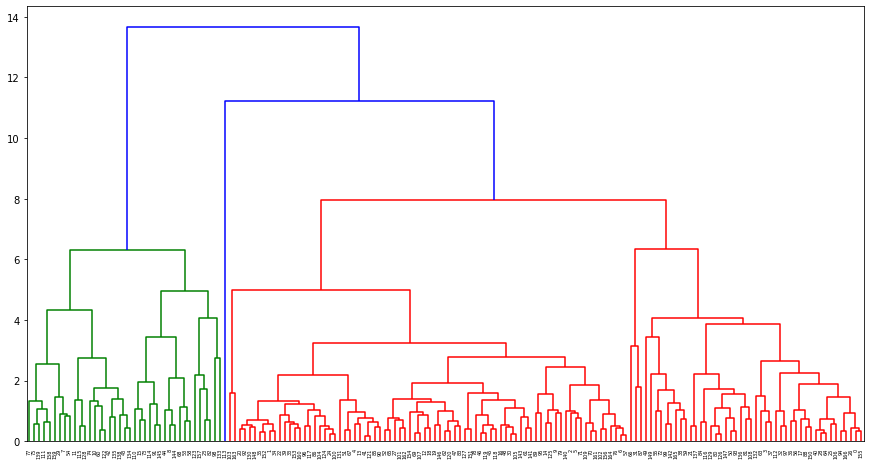

In [44]:
# complete linkage
plt.figure(figsize=(15,8))
mergings = linkage(countries_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [45]:
# 3 clusters
clabels = cut_tree(mergings, n_clusters=3).reshape(-1, )
clabels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [46]:
# assign cluster labels
countries_scaled['clusters'] = clabels
countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,1.291532,-0.643696,-0.606962,-0.672781,-0.905600,0.157336,-1.619092,1.902882,-0.748206,0
1,-0.538949,-0.525732,-0.463018,-0.449705,-0.394557,-0.312347,0.647866,-0.859973,-0.520168,0
2,-0.272833,-0.464315,-0.515195,-0.525024,-0.212129,0.789274,0.670423,-0.038404,-0.496314,0
3,2.007808,-0.411654,-0.569579,-0.510413,-0.642093,1.387054,-1.179234,2.128151,-0.556273,0
4,-0.695634,-0.048875,-0.165059,0.216923,0.168696,-0.601749,0.704258,-0.541946,0.002701,0


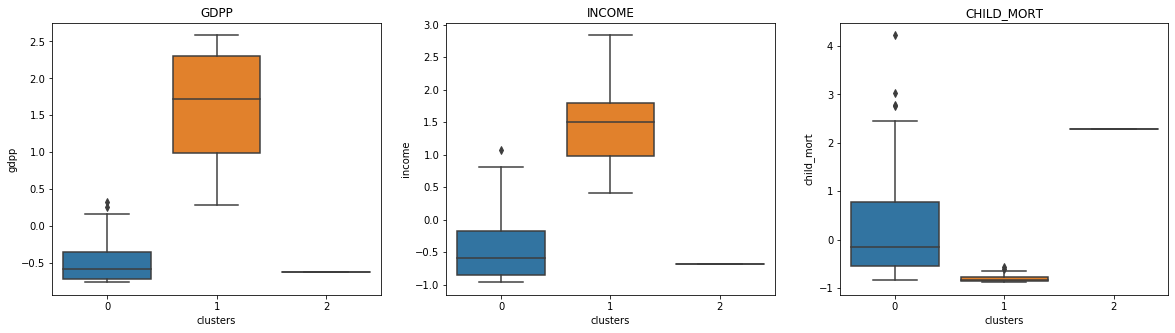

In [47]:
# Visualizing with Boxplots
plt.figure(figsize = [20,5])
plt.subplot(1,3,1) 
sns.boxplot(x='clusters', y='gdpp', data=countries_scaled)
plt.title("GDPP")
plt.subplot(1,3,2)
sns.boxplot(x='clusters', y='income', data=countries_scaled)
plt.title("INCOME")
plt.subplot(1,3,3)
sns.boxplot(x='clusters', y='child_mort', data=countries_scaled)
plt.title("CHILD_MORT")
plt.show()

- **From the boxplots cluster 0 is the one with low income, low gdpp and high child_mort rate.**

- **Based on both the Clustering models, we got Cluster 0 is the targetted cluster and among those based on descending order below are the top 10 countries who dire in need of aid**

In [48]:
#Top 10 List of Countries who are in dire need of aid
final_listofcountries.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,0
